In [1]:
import sys

In [2]:
sys.path

['/Users/bethany.lindsey/Galvanize/capstone/capstone_three/ai_fairness',
 '//anaconda3/lib/python37.zip',
 '//anaconda3/lib/python3.7',
 '//anaconda3/lib/python3.7/lib-dynload',
 '',
 '//anaconda3/lib/python3.7/site-packages',
 '//anaconda3/lib/python3.7/site-packages/aeosa',
 '//anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/bethany.lindsey/.ipython']

In [3]:
#sys.path.insert(1, "../") 

In [4]:
import numpy as np
np.random.seed(0)
import pandas as pd

In [5]:
from tqdm import tqdm

In [7]:
from common_utils import compute_metrics


In [42]:
import matplotlib.pyplot as plt

In [8]:
from aif360.datasets import GermanDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import ClassificationMetric

In [10]:
from IPython.display import Markdown, display

In [11]:
dataset_orig = GermanDataset(
    protected_attribute_names=['age'],
    privileged_classes = [lambda x: x>=25],
    features_to_drop=['personal_status', 'sex'])
    

In [12]:
type(GermanDataset)

abc.ABCMeta

In [13]:
dataset_orig_train, dataset_orig_vt = dataset_orig.split([0.7], shuffle=True)
dataset_orig_valid, dataset_orig_test = dataset_orig_vt.split([0.5], shuffle=True)

In [14]:
type(dataset_orig_train)

aif360.datasets.german_dataset.GermanDataset

In [15]:
privileged_groups= [{'age':1}]
unprivileged_groups=[{'age': 0}]

In [16]:
dataset_orig_train.label_names

['credit']

In [17]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train, 
                                             unprivileged_groups=unprivileged_groups, 
                                            privileged_groups=privileged_groups)

In [18]:
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.169905


In [46]:
RW = Reweighing(unprivileged_groups=unprivileged_groups, 
               privileged_groups=privileged_groups)

In [47]:
dataset_transf_train = RW.fit_transform(dataset_orig_train)


In [48]:
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train, 
                                             unprivileged_groups=unprivileged_groups, 
                                            privileged_groups=privileged_groups)

In [49]:
display(Markdown('#### Transformed training dataset'))
print('Difference in mean outcomes between privileged and unprivileged = %f' % metric_transf_train.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between privileged and unprivileged = 0.000000


In [23]:
type(dataset_transf_train)

aif360.datasets.german_dataset.GermanDataset

In [24]:
dataset_transf_train.protected_attribute_names

['age']

In [25]:
dataset_transf_train.feature_names

['month',
 'credit_amount',
 'investment_as_income_percentage',
 'residence_since',
 'age',
 'number_of_credits',
 'people_liable_for',
 'status=A11',
 'status=A12',
 'status=A13',
 'status=A14',
 'credit_history=A30',
 'credit_history=A31',
 'credit_history=A32',
 'credit_history=A33',
 'credit_history=A34',
 'purpose=A40',
 'purpose=A41',
 'purpose=A410',
 'purpose=A42',
 'purpose=A43',
 'purpose=A44',
 'purpose=A45',
 'purpose=A46',
 'purpose=A48',
 'purpose=A49',
 'savings=A61',
 'savings=A62',
 'savings=A63',
 'savings=A64',
 'savings=A65',
 'employment=A71',
 'employment=A72',
 'employment=A73',
 'employment=A74',
 'employment=A75',
 'other_debtors=A101',
 'other_debtors=A102',
 'other_debtors=A103',
 'property=A121',
 'property=A122',
 'property=A123',
 'property=A124',
 'installment_plans=A141',
 'installment_plans=A142',
 'installment_plans=A143',
 'housing=A151',
 'housing=A152',
 'housing=A153',
 'skill_level=A171',
 'skill_level=A172',
 'skill_level=A173',
 'skill_level=A17

In [26]:
dataset_transf_train.instance_names

['993',
 '859',
 '298',
 '553',
 '672',
 '971',
 '27',
 '231',
 '306',
 '706',
 '496',
 '558',
 '784',
 '239',
 '578',
 '55',
 '906',
 '175',
 '14',
 '77',
 '31',
 '481',
 '310',
 '311',
 '883',
 '788',
 '45',
 '103',
 '760',
 '1',
 '823',
 '710',
 '614',
 '790',
 '408',
 '736',
 '957',
 '366',
 '918',
 '267',
 '230',
 '996',
 '635',
 '698',
 '251',
 '783',
 '819',
 '141',
 '316',
 '587',
 '331',
 '295',
 '262',
 '432',
 '862',
 '582',
 '272',
 '270',
 '987',
 '319',
 '569',
 '643',
 '142',
 '202',
 '413',
 '196',
 '264',
 '531',
 '252',
 '576',
 '738',
 '299',
 '740',
 '247',
 '926',
 '412',
 '389',
 '796',
 '601',
 '654',
 '261',
 '456',
 '386',
 '982',
 '909',
 '693',
 '236',
 '501',
 '497',
 '874',
 '452',
 '494',
 '923',
 '279',
 '638',
 '485',
 '568',
 '108',
 '367',
 '644',
 '785',
 '873',
 '65',
 '902',
 '317',
 '636',
 '666',
 '789',
 '958',
 '214',
 '97',
 '583',
 '466',
 '523',
 '255',
 '385',
 '545',
 '382',
 '489',
 '513',
 '780',
 '904',
 '122',
 '946',
 '60',
 '844',
 '3

In [27]:
dataset_transf_train.instance_names[0]

'993'

### Creating a Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [29]:
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(dataset_orig_train.features)

In [30]:
y_train = dataset_orig_train.labels.ravel()

In [31]:
w_train= dataset_orig_train.instance_weights.ravel()

In [32]:
lmod = LogisticRegression()
lmod.fit(X_train, y_train, sample_weight=dataset_orig_train.instance_weights)
y_train_pred = lmod.predict(X_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
accuracy_score(y_train, y_train_pred)

0.7857142857142857

In [34]:
X_test = scale_orig.transform(dataset_orig_test.features)
y_test = dataset_orig_test.labels

In [35]:
y_test_pred = lmod.predict(X_test)

In [36]:
accuracy_score(y_test, y_test_pred)

0.7266666666666667

In [37]:
pos_ind = np.where(lmod.classes_ == dataset_orig_train.favorable_label)[0][0]

dataset_orig_test.scores = lmod.predict_proba(X_test)[:,pos_ind].reshape(-1,1)


In [38]:
dataset_orig_valid_pred = dataset_orig_valid.copy(deepcopy=True)
X_valid = scale_orig.transform(dataset_orig_valid_pred.features)
y_valid = dataset_orig_valid_pred.labels
dataset_orig_valid_pred.scores = lmod.predict_proba(X_valid)[:,pos_ind].reshape(-1,1)

dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)
X_test = scale_orig.transform(dataset_orig_test_pred.features)
y_test = dataset_orig_test_pred.labels
dataset_orig_test_pred.scores = lmod.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

In [39]:
num_thresh = 100
ba_arr = np.zeros(num_thresh)
class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
for idx, class_thresh in enumerate(class_thresh_arr):
    
    fav_inds = dataset_orig_valid_pred.scores > class_thresh
    dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
    dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label
    
    classified_metric_orig_valid = ClassificationMetric(dataset_orig_valid,
                                             dataset_orig_valid_pred, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
    
    ba_arr[idx] = 0.5*(classified_metric_orig_valid.true_positive_rate()\
                       +classified_metric_orig_valid.true_negative_rate())

best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
best_class_thresh = class_thresh_arr[best_ind]

print("Best balanced accuracy (no reweighing) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no reweighing) = %.4f" % best_class_thresh)

Best balanced accuracy (no reweighing) = 0.7261
Optimal classification threshold (no reweighing) = 0.8316


In [40]:
display(Markdown("#### Predictions from original testing data"))
bal_acc_arr_orig = []
disp_imp_arr_orig = []
avg_odds_diff_arr_orig = []

print("Classification threshold used = %.4f" % best_class_thresh)
for thresh in tqdm(class_thresh_arr):
    
    if thresh == best_class_thresh:
        disp = True
    else:
        disp = False
    
    fav_inds = dataset_orig_test_pred.scores > thresh
    dataset_orig_test_pred.labels[fav_inds] = dataset_orig_test_pred.favorable_label
    dataset_orig_test_pred.labels[~fav_inds] = dataset_orig_test_pred.unfavorable_label
    
    metric_test_bef = compute_metrics(dataset_orig_test, dataset_orig_test_pred, 
                                      unprivileged_groups, privileged_groups,
                                      disp = disp)

    bal_acc_arr_orig.append(metric_test_bef["Balanced accuracy"])
    avg_odds_diff_arr_orig.append(metric_test_bef["Average odds difference"])
    disp_imp_arr_orig.append(metric_test_bef["Disparate impact"])

#### Predictions from original testing data

 63%|██████▎   | 63/100 [00:00<00:00, 628.59it/s]

Classification threshold used = 0.8316
Balanced accuracy = 0.7050
Statistical parity difference = -0.2780
Disparate impact = 0.4309
Average odds difference = -0.1909
Equal opportunity difference = -0.4333
Theil index = 0.3457


100%|██████████| 100/100 [00:00<00:00, 421.23it/s]


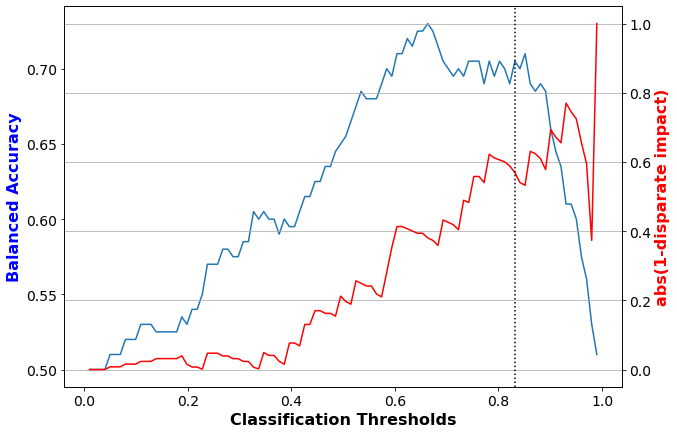

In [56]:
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(class_thresh_arr, bal_acc_arr_orig)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(class_thresh_arr, np.abs(1.0-np.array(disp_imp_arr_orig)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')
ax2.axvline(np.array(class_thresh_arr)[best_ind], 
            color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

disp_imp_at_best_bal_acc_orig = np.abs(1.0-np.array(disp_imp_arr_orig))[best_ind]

In [44]:
scale_transf = StandardScaler()
X_train = scale_transf.fit_transform(dataset_transf_train.features)
y_train = dataset_transf_train.labels.ravel()

lmod = LogisticRegression()
lmod.fit(X_train, y_train)
y_train_pred = lmod.predict(X_train)

dataset_transf_train_pred = dataset_transf_train.copy()
dataset_transf_train_pred.labels = y_train_pred

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
dataset_transf_test = RW.fit_transform(dataset_orig_test)


In [52]:
dataset_transf_test_pred = dataset_transf_test.copy(deepcopy=True)
X_test = scale_transf.transform(dataset_transf_test_pred.features)
y_test = dataset_transf_test_pred.labels
dataset_transf_test_pred.scores = lmod.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

In [53]:
display(Markdown("#### Predictions from transformed testing data"))

bal_acc_arr_transf = []
disp_imp_arr_transf = []
avg_odds_diff_arr_transf = []

display(Markdown("#### Testing set"))
display(Markdown("##### Transformed predictions - No fairness constraints"))

for thresh in tqdm(class_thresh_arr):
    
    fav_inds = dataset_transf_test_pred.scores > thresh
    dataset_transf_test_pred.labels[fav_inds] = dataset_transf_test_pred.favorable_label
    dataset_transf_test_pred.labels[~fav_inds] = dataset_transf_test_pred.unfavorable_label

    if (thresh == best_class_thresh):
        disp = True
    else:
        disp = False
        
    metric_test_bef = compute_metrics(dataset_transf_test, dataset_transf_test_pred, 
                                       unprivileged_groups, privileged_groups, disp=disp)
    
    bal_acc_arr_transf.append(metric_test_bef["Balanced accuracy"])
    avg_odds_diff_arr_transf.append(metric_test_bef["Average odds difference"])
    disp_imp_arr_transf.append(metric_test_bef["Disparate impact"])

#### Predictions from transformed testing data

#### Testing set

##### Transformed predictions - No fairness constraints


100%|██████████| 100/100 [00:00<00:00, 345.44it/s][A

Balanced accuracy = 0.7006
Statistical parity difference = -0.2717
Disparate impact = 0.4329
Average odds difference = -0.1909
Equal opportunity difference = -0.4333
Theil index = 0.3457


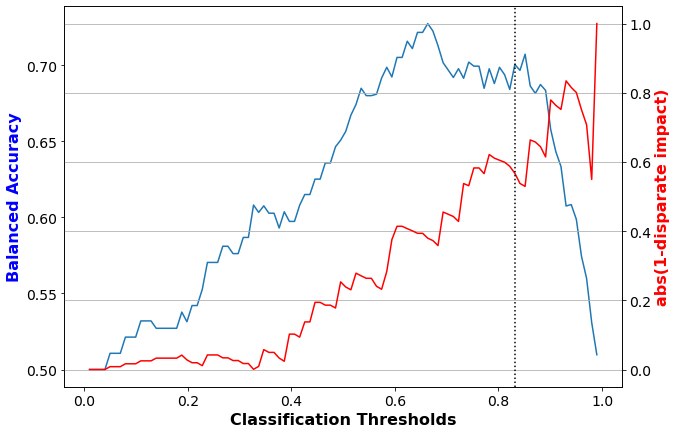

In [55]:
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(class_thresh_arr, bal_acc_arr_transf)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(class_thresh_arr, np.abs(1.0-np.array(disp_imp_arr_transf)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')
ax2.axvline(np.array(class_thresh_arr)[best_ind], 
            color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

disp_imp_at_best_bal_acc_transf = np.abs(1.0-np.array(disp_imp_arr_transf))[best_ind]